In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [55]:
df=pd.DataFrame()
d=pd.DataFrame()
ZeroFiles = []
energy = []
Xmax = []
anom_count = 0
for filename in glob.glob("*.txt"):
    #infile = files[i][0]
    #print('file number',i)
    #print(files[i][0])
    #print(infile)
    temp = pd.read_csv(filename,sep=" ",index_col=[0])
    
    if len(temp)>0:

        temp['sVEM'] = temp['sVEM'].str.strip('[]').str.split(',')
        for j, row_value in temp['sVEM'].iteritems():
            try:
                if len(temp['sVEM'][j])>1:
                    #print(type(temp['sVEM'][j][0]))
                    temp['sVEM'][j] = [float(k) for k in temp['sVEM'][j]]
                      #print(type(temp['sVEM'][j][0])) 
            except ValueError:
                print ("error","on line",j)
        temp1=pd.DataFrame(temp['sVEM'].tolist())
        
        print('original file',temp.shape)
        print('svems file',temp1.shape)
        df1=pd.concat([temp, temp1], axis=1)
        #print('after splitting svems to list',df1.shape)
        
        df1.dropna(inplace=True)
        df1[0]=df1[0].astype(float)
        group_data = df1.groupby(['eventId','sId'], as_index=False).mean()
        print(' after grouping all SVEM columns file',group_data.shape)
        t=group_data.iloc[: ,0:30].copy() 
        t['sVEM']=group_data[group_data.columns[30:]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)
        t['sVEM']=t['sVEM'].str.split(",").apply(lambda x: [float(i) for i in x])
        print(' after merging all SVEM columns file',t.shape)
        d=d.append(t,ignore_index=True)
        df=df.append(group_data,ignore_index=True)
    
        #print('after concatenating each file',df.shape)

print('length of final dataframe with svems in diff columns',df.shape)
df.to_csv('data_split.csv', index=False) 
print('length of final dataframe with svems in same columns',d.shape)
d.to_csv('data_original.csv', index=False) 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


original file (291, 31)
svems file (291, 768)
 after grouping all SVEM columns file (97, 798)
 after merging all SVEM columns file (97, 31)
original file (486, 31)
svems file (486, 768)
 after grouping all SVEM columns file (162, 798)
 after merging all SVEM columns file (162, 31)
original file (276, 31)
svems file (276, 768)
 after grouping all SVEM columns file (92, 798)
 after merging all SVEM columns file (92, 31)
original file (318, 31)
svems file (318, 768)
 after grouping all SVEM columns file (106, 798)
 after merging all SVEM columns file (106, 31)
length of final dataframe with svems in diff columns (457, 798)
length of final dataframe with svems in same columns (457, 31)


In [65]:
d.columns

Index(['eventId', 'sId', 'sPMT', 'sStatus', 'sXrel', 'sYrel', 'sZrel',
       'sdEnergy', 'sdEnergyErr', 'sdZenith', 'sdZenithErr', 'sdAzimuth',
       'sdAzimuthErr', 'sdXpos', 'sdYpos', 'sdZpos', 'sdS1000', 'sdS1000Err',
       'sdRopt', 'sdRoptErr', 'sdBeta', 'sdBetaErr', 'sdGamma', 'sdGammaErr',
       'fdXmax', 'fdXmaxErr', 'sTimeSec', 'sTimeNsec', 'sSignalStart',
       'sSignalEnd', 'sVEM'],
      dtype='object')

In [56]:
group_data.columns[30:]

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       758, 759, 760, 761, 762, 763, 764, 765, 766, 767],
      dtype='object', length=768)

In [64]:
len(df.eventId.unique())

37

In [58]:
len(df.sdEnergy.unique())

45

In [59]:
temp=df.groupby(['eventId'], as_index=False)['sdEnergy'].mean()['sdEnergy'].to_list()

In [60]:
len(temp)

37

In [62]:
eventId = d['eventId'][0]

print(eventId)

count = 0
tanks = []
starts = []
for i in range(0, len(d['eventId'])):
    thisId = d['eventId'][i]
    if(thisId == eventId):
 
        tank = d['sId'][i]
        if(tank in tanks):
 
          continue

        else:
  
          start = d['sTimeSec'][i]*1e9 + d['sTimeNsec'][i]
          tanks.append(tank)
          starts.append(start)

    else:
 
        continue

ymin = 1e9
ymax = -1e9
#fig, axs = plt.subplots(len(tanks), 3, sharex=True, sharey=True, figsize = (10,10))
print(len(starts))
for i in range(0, len(d['eventId'])):
    thisId = d['eventId'][i]
    if(thisId == eventId):

        tank = d['sId'][i]
        pmt = d['sPMT'][i]
        vem = d['sVEM'][i]
        start = d['sSignalStart'][i]
        end = d['sSignalEnd'][i]

        row = tanks.index(tank)

        offset = (starts[row] - min(starts))/25
        print(offset,tank,start,end)
        
        
    else:
        continue

auger_190025153600__sd_51584332
11
204.8 270 223.0 295.0
133.12 271 196.0 306.0
225.28 277 215.0 298.0
122.88 278 241.0 718.0
40.96 285 230.0 470.0
71.68 286 225.0 391.0
163.84 287 223.0 339.0
1822.72 400 241.0 259.0
3010.56 434 241.0 259.0
880.64 438 241.0 261.0
0.0 460 169.0 214.0


In [63]:
df=pd.DataFrame()
d=pd.DataFrame()
ZeroFiles = []
energy = []
Xmax = []
anom_count = 0
for filename in glob.glob("*.txt"):
    #infile = files[i][0]
    #print('file number',i)
    #print(files[i][0])
    #print(infile)
    temp = pd.read_csv(filename,sep=" ",index_col=[0])
    
    if len(temp)>0:

        temp['sVEM'] = temp['sVEM'].str.strip('[]').str.split(',')
        for j, row_value in temp['sVEM'].iteritems():
            try:
                if len(temp['sVEM'][j])>1:
                    #print(type(temp['sVEM'][j][0]))
                    temp['sVEM'][j] = [float(k) for k in temp['sVEM'][j]]
                      #print(type(temp['sVEM'][j][0])) 
            except ValueError:
                print ("error","on line",j)
        temp1=pd.DataFrame(temp['sVEM'].tolist())
        
        print('original file',temp.shape)
        print('svems file',temp1.shape)
        df1=pd.concat([temp, temp1], axis=1)
        #print('after splitting svems to list',df1.shape)
        
        df1.dropna(inplace=True)
        df1[0]=df1[0].astype(float)
        group_data = df1.groupby(['eventId','sId'], as_index=False).mean()
        print(' after grouping all SVEM columns file',group_data.shape)
        t=group_data.iloc[: ,0:30].copy() 
        t['sVEM']=group_data[group_data.columns[30:]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)
        t['sVEM']=t['sVEM'].str.split(",").apply(lambda x: [float(i) for i in x])
        print(' after merging all SVEM columns file',t.shape)
        d=d.append(temp,ignore_index=True)
        df=df.append(group_data,ignore_index=True)
    
        #print('after concatenating each file',df.shape)

eventId = d['eventId'][0]

print(eventId)

count = 0
tanks = []
starts = []
for i in range(0, len(d['eventId'])):
    thisId = d['eventId'][i]
    if(thisId == eventId):
 
        tank = d['sId'][i]
        if(tank in tanks):
 
          continue

        else:
  
          start = d['sTimeSec'][i]*1e9 + d['sTimeNsec'][i]
          tanks.append(tank)
          starts.append(start)

    else:
 
        continue

ymin = 1e9
ymax = -1e9
#fig, axs = plt.subplots(len(tanks), 3, sharex=True, sharey=True, figsize = (10,10))
print(len(starts))
for i in range(0, len(d['eventId'])):
    thisId = d['eventId'][i]
    if(thisId == eventId):

        tank = d['sId'][i]
        pmt = d['sPMT'][i]
        vem = d['sVEM'][i]
        start = d['sSignalStart'][i]
        end = d['sSignalEnd'][i]

        row = tanks.index(tank)

        offset = (starts[row] - min(starts))/25
        print(offset,tank,start,end)
        
        
    else:
        continue

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


original file (291, 31)
svems file (291, 768)
 after grouping all SVEM columns file (97, 798)
 after merging all SVEM columns file (97, 31)
original file (486, 31)
svems file (486, 768)
 after grouping all SVEM columns file (162, 798)
 after merging all SVEM columns file (162, 31)
original file (276, 31)
svems file (276, 768)
 after grouping all SVEM columns file (92, 798)
 after merging all SVEM columns file (92, 31)
original file (318, 31)
svems file (318, 768)
 after grouping all SVEM columns file (106, 798)
 after merging all SVEM columns file (106, 31)
auger_190025153600__sd_51584332
11
122.88 278 241 718
122.88 278 241 718
122.88 278 241 718
40.96 285 230 470
40.96 285 230 470
40.96 285 230 470
71.68 286 225 391
71.68 286 225 391
71.68 286 225 391
163.84 287 223 339
163.84 287 223 339
163.84 287 223 339
225.28 277 215 298
225.28 277 215 298
225.28 277 215 298
204.8 270 223 295
204.8 270 223 295
204.8 270 223 295
3010.56 434 241 259
3010.56 434 241 259
3010.56 434 241 259
1822.72 

In [ ]:
group_data=pd.read_csv('data.csv')

In [70]:
E = group_data.sdEnergy.unique()
lgE = np.log10(E)
lgEmin = 18.4
lgEmax = 20.1
dlgE = 0.1

lgECenters = np.arange(lgEmin + dlgE/2., lgEmax, dlgE)
ECenters = 10.**lgECenters
Counts = np.zeros(len(lgECenters))
c=np.zeros(len(lgE))
for i in range(0, len(lgE)):
    thisLgE = lgE[i]
    ibin = int((thisLgE - lgEmin)/dlgE)

    if(thisLgE < lgEmin or thisLgE > lgEmax):
        print ("Event energy out of range: lgE =", thisLgE)
        sys.exit()

    Counts[ibin] +=1
    c[i]=ibin

In [74]:
train_count=[]
test_count=[]
val_count=[]
train=pd.DataFrame()
test=pd.DataFrame()
val=pd.DataFrame()
for i in range(len(Counts)):
    id1=[]
    for j in range(len(c)):
        if i==c[j]:
            id1.append(df.eventId.unique()[j])
    if len(id1)>2:
        train_id,temp=train_test_split(id1, test_size=0.4, random_state=42)
        val_id,test_id=train_test_split(temp, test_size=0.5, random_state=42)

        train_temp = group_data.loc[group_data['eventId'].isin(train_id)]
        test_temp = group_data.loc[group_data['eventId'].isin(test_id)]
        val_temp = group_data.loc[group_data['eventId'].isin(val_id)]

        train=train.append(train_temp,ignore_index=True)
        test=test.append(test_temp,ignore_index=True)
        val=val.append(val_temp,ignore_index=True)
        
        train_count.append(train_temp.shape[0])
        test_count.append(test_temp.shape[0])
        val_count.append(val_temp.shape[0])
    elif len(id1)==2:
        train_id,test_id=train_test_split(id1, test_size=0.5, random_state=42)
        #val_id,test_id=train_test_split(temp, test_size=0.5, random_state=42)

        train_temp = group_data.loc[group_data['eventId'].isin(train_id)]
        test_temp = group_data.loc[group_data['eventId'].isin(test_id)]
        #val_temp = group_data.loc[group_data['eventId'].isin(val_id)]

        train=train.append(train_temp,ignore_index=True)
        test=test.append(test_temp,ignore_index=True)
        #val=val.append(val_temp,ignore_index=True)
        
        train_count.append(train_temp.shape[0])
        test_count.append(test_temp.shape[0])
        val_count.append(0)
    
    elif len(id1)==1:
        
        test_temp = group_data.loc[group_data['eventId'].isin(id1)]
        

        test=test.append(test_temp,ignore_index=True)
        
        train_count.append(0)
        test_count.append(test_temp.shape[0])
        val_count.append(0)
    
    else:
        train_count.append(0)
        test_count.append(0)
        val_count.append(0)
    
print('training data count',sum(train_count))
print('testing data count',sum(test_count))
print('validation data count',sum(val_count))
print('train data',train.shape)
print('test data',test.shape)
print('val data',val.shape)
print(sum(train_count)+sum(test_count)+sum(val_count))   

assert (sum(train_count)+sum(test_count)+sum(val_count))==group_data.shape[0]
train_count = pd.DataFrame(train_count)
train_count.to_csv('train_count.csv')

test_count = pd.DataFrame(test_count)
test_count.to_csv('test_count.csv')

val_count = pd.DataFrame(val_count)
val_count.to_csv('val_count.csv')

df_train=train.drop(['Unnamed: 0', 'eventId', 'sId', 'sPMT','sStatus', 'sXrel', 'sYrel', 'sZrel',
                             'sTimeSec', 'sTimeNsec','sSignalStart', 'sSignalEnd','fdXmaxErr'],axis=1)
df_test=test.drop(['Unnamed: 0', 'eventId', 'sId', 'sPMT','sStatus', 'sXrel', 'sYrel', 'sZrel',
                             'sTimeSec', 'sTimeNsec','sSignalStart', 'sSignalEnd','fdXmaxErr'],axis=1)
df_val=val.drop(['Unnamed: 0', 'eventId', 'sId', 'sPMT','sStatus', 'sXrel', 'sYrel', 'sZrel',
                             'sTimeSec', 'sTimeNsec','sSignalStart', 'sSignalEnd','fdXmaxErr'],axis=1)
df.shape

train.to_csv('train.csv')
test.to_csv('test.csv')
val.to_csv('val.csv')

training data count 198
testing data count 188
validation data count 71
train data (198, 798)
test data (188, 798)
val data (71, 798)
457


In [51]:
print(198+188+71)

457


In [52]:
len(train_count)

17

In [84]:
train_id,temp=train_test_split(group_data.eventId.unique(), test_size=0.2, random_state=42)
val_id,test_id=train_test_split(temp, test_size=0.5, random_state=42)

In [85]:
len(train),len(test),len(val)

(29, 4, 4)

In [86]:
train = group_data.loc[group_data['eventId'].isin(train_id)]
test = group_data.loc[group_data['eventId'].isin(test_id)]
val = group_data.loc[group_data['eventId'].isin(val_id)]
#test = group_data.iloc[test_inds]

In [193]:
len(train.eventId.unique())

29

In [88]:
len(test.eventId.unique())

4

In [89]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
val=pd.read_csv('val.csv')
df_train=train.drop(columns=['eventId', 'sId', 'sPMT','sTimeSec', 'sTimeNsec',
       'sSignalStart', 'sSignalEnd','fdXmaxErr'])
df_test=test.drop(columns=['eventId', 'sId', 'sPMT','sTimeSec', 'sTimeNsec',
       'sSignalStart', 'sSignalEnd','fdXmaxErr'])
df_val=val.drop(columns=['eventId', 'sId', 'sPMT','sTimeSec', 'sTimeNsec',
       'sSignalStart', 'sSignalEnd','fdXmaxErr'])
df.shape

(1371, 800)

In [90]:
y_train=np.array(df_train['fdXmax'].to_list())
y_train=np.reshape(y_train, (-1,1))
X_train=df_train.drop(columns=['fdXmax'])

y_test=np.array(df_test['fdXmax'].to_list())
y_test=np.reshape(y_test, (-1,1))
X_test=df_test.drop(columns=['fdXmax'])

y_val=np.array(df_val['fdXmax'].to_list())
y_val=np.reshape(y_val, (-1,1))
X_val=df_val.drop(columns=['fdXmax'])
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
#y_train=np.array(df_train['fdXmax'].to_list())
#y_train=np.reshape(y_train, (-1,1))

In [10]:

#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1)


In [91]:
y_train.shape[0]

357

In [92]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

fit_X=scaler_x.fit(X_train)
X_train=fit_X.transform(X_train)
X_test=fit_X.transform(X_test)
X_val=fit_X.transform(X_val)

fit_y=scaler_y.fit(y_train)
y_train=fit_y.transform(y_train)
y_test=fit_y.transform(y_test)
y_val=fit_y.transform(y_val)

In [171]:
import numpy as np
np.random.seed(1337)
model = Sequential()
model.add(Dense(1500, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
#model.add(Dense(300, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
#model.add(Dense(30, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 1500)              1183500   
_________________________________________________________________
dense_25 (Dense)             (None, 100)               150100    
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 101       
Total params: 1,333,701
Trainable params: 1,333,701
Non-trainable params: 0
_________________________________________________________________


In [172]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'],learning_rate=0.01)

In [183]:
history = model.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=100, batch_size=32,  verbose=1,shuffle=False)

Train on 357 samples, validate on 39 samples
Epoch 1/100
357/357 [==============================] - 1s 2ms/sample - loss: 0.0199 - mse: 0.0199 - mae: 0.1041 - val_loss: 0.0235 - val_mse: 0.0235 - val_mae: 0.1278
Epoch 2/100
357/357 [==============================] - 1s 2ms/sample - loss: 0.0201 - mse: 0.0201 - mae: 0.1052 - val_loss: 0.0245 - val_mse: 0.0245 - val_mae: 0.1331
Epoch 3/100
357/357 [==============================] - 1s 2ms/sample - loss: 0.0199 - mse: 0.0199 - mae: 0.1036 - val_loss: 0.0246 - val_mse: 0.0246 - val_mae: 0.1345
Epoch 4/100
357/357 [==============================] - 1s 2ms/sample - loss: 0.0204 - mse: 0.0204 - mae: 0.1054 - val_loss: 0.0234 - val_mse: 0.0234 - val_mae: 0.1271
Epoch 5/100
357/357 [==============================] - 1s 2ms/sample - loss: 0.0206 - mse: 0.0206 - mae: 0.1068 - val_loss: 0.0252 - val_mse: 0.0252 - val_mae: 0.1337
Epoch 6/100
357/357 [==============================] - 1s 2ms/sample - loss: 0.0197 - mse: 0.0197 - mae: 0.1036 - val_lo

Epoch 98/100
357/357 [==============================] - 1s 2ms/sample - loss: 0.0169 - mse: 0.0169 - mae: 0.0905 - val_loss: 0.0237 - val_mse: 0.0237 - val_mae: 0.1361
Epoch 99/100
357/357 [==============================] - 1s 2ms/sample - loss: 0.0173 - mse: 0.0173 - mae: 0.0942 - val_loss: 0.0231 - val_mse: 0.0231 - val_mae: 0.1321
Epoch 100/100
357/357 [==============================] - 2s 6ms/sample - loss: 0.0168 - mse: 0.0168 - mae: 0.0903 - val_loss: 0.0235 - val_mse: 0.0235 - val_mae: 0.1354


dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


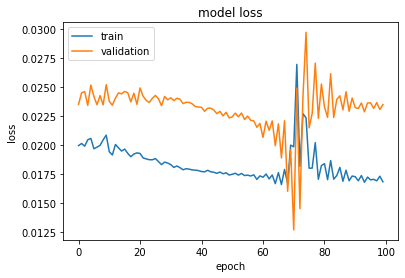

In [184]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig("model_loss.png")
plt.show()

In [222]:
y_pred= model.predict(X_train)

In [223]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print('normal mse',sqrt(mean_squared_error(y_train, y_pred)))
print('normal mae',mean_absolute_error(y_train, y_pred))

0.1200358884659769

0.08841417484961783

In [226]:
y_test.shape
y_test=np.reshape(y_train, (y_train.shape[0],1))
y_pred=np.reshape(y_pred, (y_train.shape[0],1))
y_test_normalized=scaler_y.inverse_transform(y_train)
y_pred_normalized=scaler_y.inverse_transform(y_pred)
y_test=np.reshape(y_train, (y_train.shape[0],))
y_pred=np.reshape(y_pred, (y_train.shape[0],))
y_test_normalized=np.reshape(y_test_normalized, (y_train.shape[0],))
y_pred_normalized=np.reshape(y_pred_normalized, (y_train.shape[0],))

In [227]:
print('mse',sqrt(mean_squared_error(y_test_normalized, y_pred_normalized)))

56.43125653340253

In [228]:
print('mae',mean_absolute_error(y_test_normalized, y_pred_normalized))

41.56526104243414

In [230]:
df_result=pd.DataFrame()

df_result['Normalized True Value']=y_test
df_result['Normalized Predicted Value']=y_pred
df_result['True Value']=y_test_normalized
df_result['Predicted Value']=y_pred_normalized

df_result.to_csv('results.csv')

,Normalized True Value,Normalized Predicted Value,True Value,Predicted Value
0,0.653521,0.647992,760.832895,758.233887
1,0.653521,0.651541,760.832895,759.902100
2,0.653521,0.667274,760.832895,767.298706
3,0.653521,0.660939,760.832895,764.320435
4,0.653521,0.672653,760.832895,769.827637
...,...,...,...,...
352,0.507272,0.636135,692.078591,752.659790
353,0.507272,0.498161,692.078591,687.795349
354,0.507272,0.586401,692.078591,729.278381
355,0.507272,0.619912,692.078591,745.032654


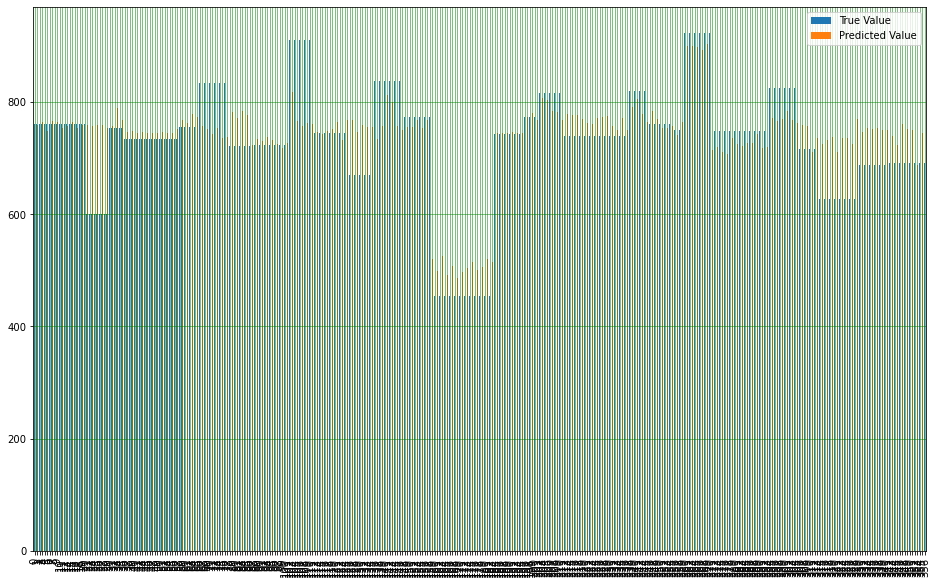

In [231]:
df1 = df_result[['True Value','Predicted Value']]
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [232]:
test.to_csv('test.csv')

In [233]:
test.eventId.unique()

array(['auger_190035945100__sd_51601400',
       'auger_190045042400__sd_51612981',
       'auger_190046203000__sd_51615952',
       'auger_190046377000__sd_51616413'], dtype=object)

In [234]:
list(test.columns)

['eventId',
 'sId',
 'Unnamed: 0',
 'sPMT',
 'sStatus',
 'sXrel',
 'sYrel',
 'sZrel',
 'sdEnergy',
 'sdEnergyErr',
 'sdZenith',
 'sdZenithErr',
 'sdAzimuth',
 'sdAzimuthErr',
 'sdXpos',
 'sdYpos',
 'sdZpos',
 'sdS1000',
 'sdS1000Err',
 'sdRopt',
 'sdRoptErr',
 'sdBeta',
 'sdBetaErr',
 'sdGamma',
 'sdGammaErr',
 'fdXmax',
 'fdXmaxErr',
 'sTimeSec',
 'sTimeNsec',
 'sSignalStart',
 'sSignalEnd',
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119

In [235]:
t = test.groupby(['eventId'])['sdS1000' ]#sum function
print('test')
for key, item in t:
    print(key)
    print(t.get_group(key).value_counts(), "\n\n")
'''    
t = train.groupby(['eventId'])['sdS1000' ]#sum function
print('train')
for key, item in t:
    print(key)
    print(t.get_group(key).value_counts(), "\n\n")
    

t = val.groupby(['eventId'])['sdS1000' ]#sum function
print('val')
for key, item in t:
    print(key)
    print(t.get_group(key).value_counts(), "\n\n")
    
'''

test
auger_190035945100__sd_51601400
10.031016    11
Name: sdS1000, dtype: int64 


auger_190045042400__sd_51612981
11.29606    11
Name: sdS1000, dtype: int64 


auger_190046203000__sd_51615952
44.283565    30
Name: sdS1000, dtype: int64 


auger_190046377000__sd_51616413
19.92658    9
Name: sdS1000, dtype: int64 




'    \nt = train.groupby([\'eventId\'])[\'sdS1000\' ]#sum function\nprint(\'train\')\nfor key, item in t:\n    print(key)\n    print(t.get_group(key).value_counts(), "\n\n")\n    \n\nt = val.groupby([\'eventId\'])[\'sdS1000\' ]#sum function\nprint(\'val\')\nfor key, item in t:\n    print(key)\n    print(t.get_group(key).value_counts(), "\n\n")\n    \n'

In [214]:
t = test.groupby(['eventId'])['sdRopt' ]#sum function
print('test')
for key, item in t:
    print(key)
    print(t.get_group(key).value_counts(), "\n\n")
'''  
t = train.groupby(['eventId'])['sdRopt' ]#sum function
print('train')
for key, item in t:
    print(key)
    print(t.get_group(key).value_counts(), "\n\n")
    
t = val.groupby(['eventId'])['sdRopt' ]#sum function
print('val')
for key, item in t:
    print(key)
    print(t.get_group(key).value_counts(), "\n\n")
    
'''    

test
auger_190035945100__sd_51601400
928.547779    11
Name: sdRopt, dtype: int64 


auger_190045042400__sd_51612981
804.083163    11
Name: sdRopt, dtype: int64 


auger_190046203000__sd_51615952
1025.979115    30
Name: sdRopt, dtype: int64 


auger_190046377000__sd_51616413
899.621448    9
Name: sdRopt, dtype: int64 




'  \nt = train.groupby([\'eventId\'])[\'sdRopt\' ]#sum function\nprint(\'train\')\nfor key, item in t:\n    print(key)\n    print(t.get_group(key).value_counts(), "\n\n")\n    \nt = val.groupby([\'eventId\'])[\'sdRopt\' ]#sum function\nprint(\'val\')\nfor key, item in t:\n    print(key)\n    print(t.get_group(key).value_counts(), "\n\n")\n    \n'

In [208]:
t = test.groupby(['eventId'])['sdAzimuth' ]#sum function
for key, item in t:
    print(key)
    print(t.get_group(key).value_counts(), "\n\n")

auger_190035945100__sd_51601400
4.826304    11
Name: sdAzimuth, dtype: int64 


auger_190045042400__sd_51612981
5.993631    11
Name: sdAzimuth, dtype: int64 


auger_190046203000__sd_51615952
1.391287    30
Name: sdAzimuth, dtype: int64 


auger_190046377000__sd_51616413
5.019198    9
Name: sdAzimuth, dtype: int64 




In [205]:
t = test.groupby(['eventId'])['sdEnergy' ]#sum function
for key, item in t:
    print(key)
    print(t.get_group(key).value_counts(), "\n\n")

auger_190035945100__sd_51601400
3.991804e+18    11
Name: sdEnergy, dtype: int64 


auger_190045042400__sd_51612981
3.323436e+18    11
Name: sdEnergy, dtype: int64 


auger_190046203000__sd_51615952
1.542413e+19    30
Name: sdEnergy, dtype: int64 


auger_190046377000__sd_51616413
3.795948e+18    9
Name: sdEnergy, dtype: int64 




In [206]:
t = test.groupby(['eventId'])['fdXmax' ]#sum function
for key, item in t:
    print(key)
    print(t.get_group(key).value_counts(), "\n\n")

auger_190035945100__sd_51601400
762.738377    11
Name: fdXmax, dtype: int64 


auger_190045042400__sd_51612981
697.633357    11
Name: fdXmax, dtype: int64 


auger_190046203000__sd_51615952
429.86904    30
Name: fdXmax, dtype: int64 


auger_190046377000__sd_51616413
754.462984    9
Name: fdXmax, dtype: int64 




In [217]:
t = train.groupby(['eventId'])['sdEnergy' ]#sum function
for key, item in t:
    print(key)
    print(t.get_group(key).value_counts(), "\n\n")

auger_190025153600__sd_51584332
6.047499e+18    11
Name: sdEnergy, dtype: int64 


auger_190025387700__sd_51584833
8.137928e+18    10
Name: sdEnergy, dtype: int64 


auger_190025548800__sd_51585214
3.203591e+18    9
Name: sdEnergy, dtype: int64 


auger_190025775500__sd_51585709
3.600975e+18    6
Name: sdEnergy, dtype: int64 


auger_190026181000__sd_51586704
1.530359e+19    22
Name: sdEnergy, dtype: int64 


auger_190026422200__sd_51587256
3.445948e+18    8
Name: sdEnergy, dtype: int64 


auger_190026746200__sd_51588055
1.302529e+19    12
Name: sdEnergy, dtype: int64 


auger_190035074600__sd_51599433
3.626397e+18    9
Name: sdEnergy, dtype: int64 


auger_190035169000__sd_51599646
1.527939e+19    15
Name: sdEnergy, dtype: int64 


auger_190035350300__sd_51600057
4.584027e+18    10
Name: sdEnergy, dtype: int64 


auger_190035427800__sd_51600238
1.021819e+19    13
Name: sdEnergy, dtype: int64 


auger_190036155100__sd_51601917
4.418981e+18    11
Name: sdEnergy, dtype: int64 


auger_19

In [216]:
t = train.groupby(['eventId'])['fdXmax' ]#sum function
for key, item in t:
    print(key)
    print(t.get_group(key).value_counts(), "\n\n")

auger_190025153600__sd_51584332
760.832895    11
Name: fdXmax, dtype: int64 


auger_190025387700__sd_51584833
760.631725    10
Name: fdXmax, dtype: int64 


auger_190025548800__sd_51585214
600.678021    9
Name: fdXmax, dtype: int64 


auger_190025775500__sd_51585709
754.25549    6
Name: fdXmax, dtype: int64 


auger_190026181000__sd_51586704
734.078506    22
Name: fdXmax, dtype: int64 


auger_190026422200__sd_51587256
755.299815    8
Name: fdXmax, dtype: int64 


auger_190026746200__sd_51588055
835.039155    12
Name: fdXmax, dtype: int64 


auger_190035074600__sd_51599433
722.575748    9
Name: fdXmax, dtype: int64 


auger_190035169000__sd_51599646
723.530703    15
Name: fdXmax, dtype: int64 


auger_190035350300__sd_51600057
911.397012    10
Name: fdXmax, dtype: int64 


auger_190035427800__sd_51600238
745.555637    13
Name: fdXmax, dtype: int64 


auger_190036155100__sd_51601917
670.150608    11
Name: fdXmax, dtype: int64 


auger_190036310500__sd_51602289
838.688675    12
Name: fd

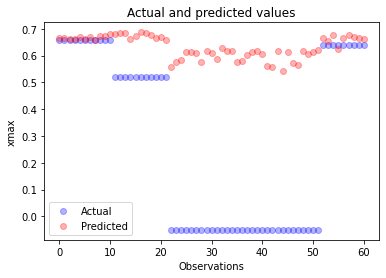

In [218]:
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('xmax')
plt.legend()
plt.savefig("xmax_vs_observation.png")
plt.show()


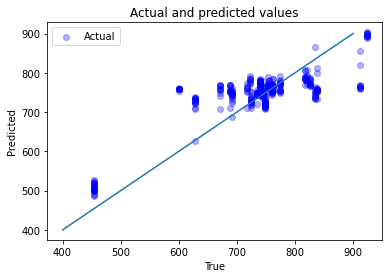

In [239]:
_, ax = plt.subplots()
x = [ 400, 500, 600, 700,800,900]
y = [400, 500, 600, 700,800,900]
ax.scatter(x = df_result['True Value'], y=df_result['Predicted Value'], c = 'blue', label = 'Actual', alpha = 0.3)
#ax.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted', alpha = 0.3)
plt.plot(x,y)
plt.title('Actual and predicted values')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.legend()
plt.savefig("actual_vs_predicted.png")
plt.show()


Text(0, 0.5, 'Frequency')

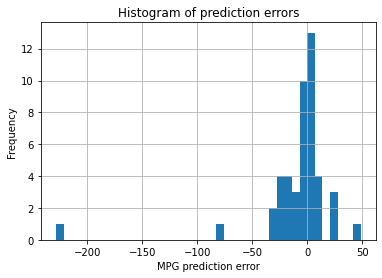

In [48]:
diff = df_result['True Value'] - df_result['Predicted Value']
diff.hist(bins = 40)
plt.title('Histogram of prediction errors')
plt.xlabel('MPG prediction error')
plt.ylabel('Frequency')
plt.savefig('prediction_histogram.png')